<a href="https://colab.research.google.com/github/Nithesh-b/DS-Algorithms/blob/master/Regression/AirQuality/Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Answer 1.1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns; sns.set()

In [ ]:
AirQuality_data = pd.read_excel('AirQuality.xlsx')

In [ ]:
c=AirQuality_data[['CO(GT)']].values.reshape(-1,1)
h=AirQuality_data[['NOx(GT)']].values.reshape(-1,1)
mean_c = AirQuality_data['CO(GT)'].mean()
mean_h = AirQuality_data['NOx(GT)'].mean()
print(mean_c, mean_h)

-34.20752377898902 168.6042000641236


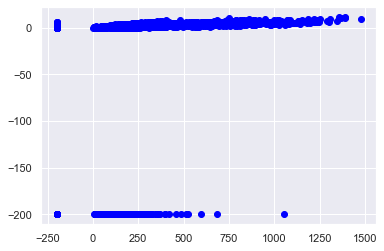

In [ ]:
plt.scatter(h,c,  color='blue')
#plt.plot(c,h, color='red', linewidth=2)

Checking if there are any missing values

In [ ]:
AirQuality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Replacing the -200 values with Nan

In [ ]:
AirQuality_data['CO(GT)'].replace(-200, np.nan, inplace = True)
AirQuality_data['NOx(GT)'].replace(-200, np.nan, inplace = True)

In [ ]:
AirQuality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
mean_co = AirQuality_data['CO(GT)'].mean()
mean_no = AirQuality_data['NOx(GT)'].mean()

In [ ]:
print(mean_co,mean_no)

2.1527495439145157 246.88125161959098


In [ ]:
AirQuality_data['CO(GT)'] = AirQuality_data['CO(GT)'].fillna(mean_co)
AirQuality_data['NOx(GT)'] = AirQuality_data['NOx(GT)'].fillna(mean_no)

In [ ]:
mean_co_new = AirQuality_data['CO(GT)'].mean()
mean_no_new = AirQuality_data['NOx(GT)'].mean()

In [ ]:
X = AirQuality_data['NOx(GT)'].values.reshape(-1,1)
y = AirQuality_data['CO(GT)'].values.reshape(-1,1)

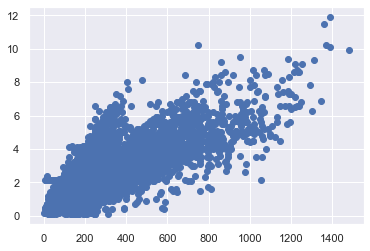

In [ ]:
plt.scatter(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
coeff=model.coef_
print ('Coefficient of equation is ' + str(coeff))
intercept=model.intercept_
print ('Intercept of the equation is ' + str(intercept))
print ('Root Mean square error is ' , math.sqrt(mse(y_test, y_predict)))

Coefficient of equation is [[0.00515929]]
Intercept of the equation is [0.87447871]
Root Mean square error is  0.8606684927838965


In [ ]:
print ("R^2 error is " + str(r2_score(y_test, y_predict)))

R^2 error is 0.5865688307687522


# Answer 1.2

Implementing the solution using numpy

Calculating the mean of x and y

In [ ]:
n = np.size(X) 
m_x, m_y = np.mean(X), np.mean(y)

In [ ]:
SS_xy = np.sum(y*X) - n*m_y*m_x 
SS_xx = np.sum(X*X) - n*m_x*m_x   
b_1 = SS_xy / SS_xx 
b_0 = m_y - b_1*m_x;
print("Coefficient of the equation is " + str(b_1))
print("Intercept of the equation is " + str(b_0))

Coefficient of the equation is 0.005186838018710344
Intercept of the equation is 0.8722164819072291


The values obtained from numpy is almost equal to the values from scikit learn. The same can be achieved with pandas.

We should be able to implement it using any of the libraries pandas, numpy or scikit-learn but scikit learn is preffered as it has built-in function of linear regression whcih we can make use of it and the result would be same as that if we create a linear regression function using the modules of pandas and numpy. Also, the time taken is less with the scikit learn module.

For Question 1, we have analyzed the data, verified that it does not have any missing values, replaced the incorrect(-200) values with the mean of the feature and then we were able to find the linear relationship between CO and NOx.

# Answer 2.1.a - Gradient Descent Algorithm

Removing the values of NMHC as it has more outliers(-200). Also, removing C6H6(GT), PT08.S5(O3), PT08.s4(NO2) as these values does not affect the CO value.

In [ ]:
AirQuality = pd.read_excel('AirQuality.xlsx')
AirQuality_filter = AirQuality
AirQuality_filter = AirQuality_filter.drop('Date', axis=1)
AirQuality_filter = AirQuality_filter.drop('Time', axis=1)
AirQuality_filter = AirQuality_filter.drop('NMHC(GT)', axis=1)
AirQuality_filter = AirQuality_filter.drop('C6H6(GT)', axis=1)
AirQuality_filter = AirQuality_filter.drop('PT08.S5(O3)', axis=1)
AirQuality_filter = AirQuality_filter.drop('PT08.S4(NO2)', axis=1)
print(AirQuality_filter)

      CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0        2.6      1360.00        1045.50    166.0       1056.25    113.0   
1        2.0      1292.25         954.75    103.0       1173.75     92.0   
2        2.2      1402.00         939.25    131.0       1140.00    114.0   
3        2.2      1375.50         948.25    172.0       1092.00    122.0   
4        1.6      1272.25         835.50    131.0       1205.00    116.0   
...      ...          ...            ...      ...           ...      ...   
9352     3.1      1314.25        1101.25    471.7        538.50    189.8   
9353     2.4      1162.50        1027.00    353.3        603.75    179.2   
9354     2.4      1142.00        1062.50    293.0        603.25    174.7   
9355     2.1      1002.50         960.50    234.5        701.50    155.7   
9356     2.2      1070.75        1047.25    265.2        654.00    167.7   

           T         RH        AH  
0     13.600  48.875001  0.757754  
1     13.300  4

In [ ]:
AirQuality_filter.replace(-200,np.nan,inplace=True)
print(AirQuality_filter.tail())
AirQuality_filter = AirQuality_filter.fillna(AirQuality_filter.mean())
print(AirQuality_filter.tail())
Final_df = preprocessing.normalize(AirQuality_filter)

      CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
9352     3.1      1314.25        1101.25    471.7        538.50    189.8   
9353     2.4      1162.50        1027.00    353.3        603.75    179.2   
9354     2.4      1142.00        1062.50    293.0        603.25    174.7   
9355     2.1      1002.50         960.50    234.5        701.50    155.7   
9356     2.2      1070.75        1047.25    265.2        654.00    167.7   

           T      RH        AH  
9352  21.850  29.250  0.756824  
9353  24.325  23.725  0.711864  
9354  26.900  18.350  0.640649  
9355  28.325  13.550  0.513866  
9356  28.500  13.125  0.502804  
      CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
9352     3.1      1314.25        1101.25    471.7        538.50    189.8   
9353     2.4      1162.50        1027.00    353.3        603.75    179.2   
9354     2.4      1142.00        1062.50    293.0        603.25    174.7   
9355     2.1      1002.50         960.50 

In [ ]:
x=Final_df[:,1:]
y=Final_df[:,[0]]
print(x.shape, y.shape)
print(x,y)

(9357, 8) (9357, 1)
[[6.71554551e-01 5.16257561e-01 8.19691584e-02 ... 6.71554546e-03
  2.41339921e-02 3.74171345e-04]
 [6.47691361e-01 4.78532270e-01 5.16248482e-02 ... 6.66612116e-03
  2.39078180e-02 3.63623102e-04]
 [6.85690431e-01 4.59368571e-01 6.40695053e-02 ... 5.82005434e-03
  2.63981036e-02 3.66927068e-04]
 ...
 [6.68944831e-01 6.22376430e-01 1.71629453e-01 ... 1.57571066e-02
  1.07488069e-02 3.75270303e-04]
 [6.34050357e-01 6.07486652e-01 1.48314024e-01 ... 1.79146895e-02
  8.56995742e-03 3.25004357e-04]
 [6.43305102e-01 6.29186335e-01 1.59331789e-01 ... 1.71227604e-02
  7.88548163e-03 3.02083763e-04]] [[0.00128385]
 [0.00100242]
 [0.00107598]
 ...
 [0.00140584]
 [0.00132819]
 [0.00132176]]


In [ ]:
learning_rate = 0.000001
iteration = 1000
w0 = np.ones([8,1])
m = 1
y_pred = []
cost = []
theta = []
error = 0

In [ ]:
def GD(x,y,w0,learning_rate,m,num_itr):
    for i in range(0,num_itr):
        y_pred_value = np.dot(x, w0)
        y_pred.append(y_pred_value)
        error = y_pred_value - y
        cost_value = (1/2*m)*np.dot(error.T, error)
        cost.append(cost_value)
        w0 = w0 - (learning_rate * (1/m) * np.dot(x.T, error)) 
        theta.append(w0)
    return cost, theta
cost,theta = GD(x,y,w0,learning_rate,m,iteration);


In [ ]:
#print (len(theta),len(cost))
#print (theta)
#print ('------------------------------------------------------------------------')
#print (cost)
cost_list = np.vstack(cost)
print(cost_list[-1])

[19.79740118]


We can incur from the graph below that the cost function tends to reduce after 20 iterations

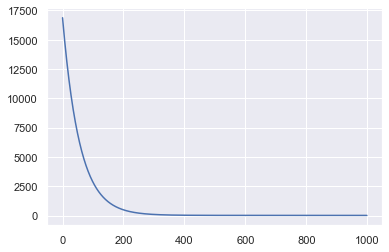

In [ ]:
plt.plot(cost_list)

Let us define a cost function which will be used for Stochastic Gradient Descent and Mini-batch Gradient Descent algorithms

# Answer 2.1.b - Stochastic Gradient Descent Algorithm

In [ ]:
def SGD(X,y,theta,learning_rate,iterations):
    for it in range(iterations):
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)
            y_pred.append(prediction)
            error = prediction - y_i
            theta = theta - (learning_rate * (1/m) * np.dot(X_i.T, error))
            cost_value = 1/(2*m)* np.dot(error.T, error)
            cost.append(cost_value)
    return theta, cost

In [ ]:
theta_sgd,cost_sgd = SGD(x,y,w0,learning_rate,iteration)
print (len(theta_sgd))

8


[1.75820804]


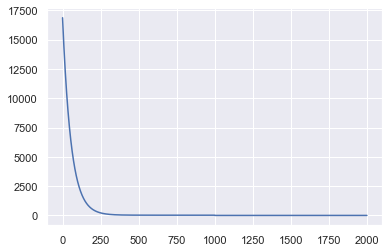

In [ ]:
cost_list_sgd = np.vstack(cost_sgd)
plt.plot(cost_list_sgd)
#print (theta_sgd)
print(cost_list_sgd[-1])

# Answer 2.1.c - Mini-Batch Gradient Descent Algorithm

In [ ]:
def minibatch_gradient_descent(X,y,theta,learning_rate,iterations,batch_size =100):
    m = len(y)
    n_batches = int(m/batch_size)
    for it in range(iterations):
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            prediction = np.dot(X_i,theta)
            y_pred.append(prediction)
            error = prediction - y_i
            cost_value = 1/(2*m)* np.dot(error.T, error)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
        cost.append(cost_value)        
    return theta, cost

[0.01132099]


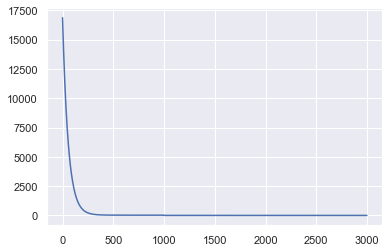

In [ ]:
theta_mgd,cost_mgd = minibatch_gradient_descent(x,y,w0,learning_rate,iteration)
cost_mgd_list = np.vstack(cost_mgd)
print(cost_mgd_list[-1])
plt.plot(cost_mgd_list)

# Answer 2.2

We can find the corelation between CO and other chemicals and infur that it is linearly related to PT08.S2(NMHC), PT08.S1(CO)  and NOx(GT) and inversely related to PT08.S3(NOx).

In [ ]:
AirQuality_filter.corr()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,AH
CO(GT),1.000000,0.773394,0.795586,0.762297,-0.613870,0.646528,0.020260,0.043204,0.043273
PT08.S1(CO),0.773394,1.000000,0.892972,0.615974,-0.771918,0.562997,0.048628,0.114607,0.135323
PT08.S2(NMHC),0.795586,0.892972,1.000000,0.601812,-0.796687,0.561421,0.241330,-0.090352,0.186906
NOx(GT),0.762297,0.615974,0.601812,1.000000,-0.563259,0.763133,-0.235657,0.192578,-0.126831
PT08.S3(NOx),-0.613870,-0.771918,-0.796687,-0.563259,1.000000,-0.569535,-0.145133,-0.056730,-0.232021
NO2(GT),0.646528,0.562997,0.561421,0.763133,-0.569535,1.000000,-0.165317,-0.080645,-0.291200
T,0.020260,0.048628,0.241330,-0.235657,-0.145133,-0.165317,1.000000,-0.578569,0.656471
RH,0.043204,0.114607,-0.090352,0.192578,-0.056730,-0.080645,-0.578569,1.000000,0.167971
AH,0.043273,0.135323,0.186906,-0.126831,-0.232021,-0.291200,0.656471,0.167971,1.000000


This can be proven visually using the graph below.

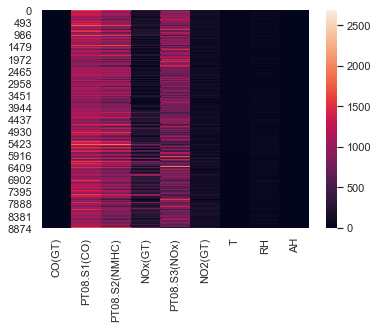

In [ ]:
ax = sns.heatmap(AirQuality_filter)

# Answer 2.3

Mini_Batch gradient descent is implemented with 100 batches from our dataset of 9357 rows. The learning rate is 0.000001 with 1000 iterations for all the algorithms.

Using Mini-Batch Gradient Descent seems like good fit for this dataset as it tends to converge to least error with less number of iterations. This is achieved by removing the outliers and finding the correlation between the chemicals and identifying the factor which contribute to low CO.

We can conclude from the last cost function values of Gradient Descent(19.79740118), Stochastic Gradient Descent(1.75820804) and Mini-Batch Gradient Descent(0.01101319) that the MiniBatch Gradient descent gives the least error. 

The AirQuality to be better in the months of January, March and May during the early hours of the day by observing analytically.